**PREDICTING OVARIAN CANCER RISK AND PROGRESSION USING CLINICAL AND BIOLOGICAL DATA**

**INTRODUCTION**

Ovarian Cancer is one of the deadliest gynecological diseases faced by women today. Lack of awareness about early symptoms and others contributes to the spread of this disease. Predicting the risk and progression of ovarian cancer using biological and clinical data can significantly improve early detection, personalized treatment strategies, and patient outcomes.

This project focuses on developing a machine learning-based predictive model that integrates clinical and biological data to assess ovarian cancer risk and progression. By leveraging patient demographics, medical history, laboratory test results imaging data, and genetic mutations, we aim to provide a data-driven approach to assist in early diagnosis and progression estimation.

**IMPORT THE STATEMENTS AND DATA PRE-PROCESSING**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("D:\My project\\Ovarian_patient_data.csv")

In [3]:
data

,Timestamp,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,Histopathology,PreviousTreatment,MenstrualHistory,...,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
0,2019-01-01 00:00:00,67.450712,27.468755,0,0,66.738329,0,serous,0,regular,...,57.572038,1.285647,1.948916,0,0,0,12.077803,54.947593,2,0.176654
1,2019-01-01 01:00:00,57.926035,27.736019,1,0,28.390526,1,clear cell,0,regular,...,44.385558,0.656970,3.589821,0,0,0,12.745908,46.864164,0,0.343371
2,2019-01-01 02:00:00,69.715328,22.285561,0,0,118.120787,3,clear cell,1,regular,...,35.711312,1.034179,3.625658,0,0,0,12.495603,55.757130,0,0.036907
3,2019-01-01 03:00:00,82.845448,31.315519,1,1,6.418598,0,serous,1,regular,...,49.922109,1.000078,1.108221,0,0,0,12.577276,50.462495,1,0.161943
4,2019-01-01 04:00:00,56.487699,17.056296,1,0,65.912779,1,mucinous,0,regular,...,43.547336,1.415819,1.030482,2,0,0,14.698884,58.628299,0,0.554210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200095,2041-10-29 07:00:00,56.482842,37.250369,1,1,10.963560,3,serous,0,regular,...,52.644672,0.500000,3.499102,0,0,0,12.593397,53.628508,2,0.179641
200096,2041-10-29 08:00:00,45.268634,16.790468,0,0,66.198115,0,serous,0,irregular,...,46.996590,1.009867,2.807436,1,0,0,13.653758,52.514075,3,0.312034
200097,2041-10-29 09:00:00,77.853943,21.333605,0,0,41.621119,2,serous,0,regular,...,50.529664,0.829427,4.394963,0,0,0,10.527138,60.000000,2,0.043449
200098,2041-10-29 10:00:00,71.047060,31.607421,1,0,59.717572,0,serous,0,regular,...,48.182645,0.989097,2.777310,0,0,0,13.053107,51.423338,0,0.223509


In [4]:
data.head()

,Timestamp,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,Histopathology,PreviousTreatment,MenstrualHistory,...,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
0,2019-01-01 00:00:00,67.450712,27.468755,0,0,66.738329,0,serous,0,regular,...,57.572038,1.285647,1.948916,0,0,0,12.077803,54.947593,2,0.176654
1,2019-01-01 01:00:00,57.926035,27.736019,1,0,28.390526,1,clear cell,0,regular,...,44.385558,0.656970,3.589821,0,0,0,12.745908,46.864164,0,0.343371
2,2019-01-01 02:00:00,69.715328,22.285561,0,0,118.120787,3,clear cell,1,regular,...,35.711312,1.034179,3.625658,0,0,0,12.495603,55.757130,0,0.036907
3,2019-01-01 03:00:00,82.845448,31.315519,1,1,6.418598,0,serous,1,regular,...,49.922109,1.000078,1.108221,0,0,0,12.577276,50.462495,1,0.161943
4,2019-01-01 04:00:00,56.487699,17.056296,1,0,65.912779,1,mucinous,0,regular,...,43.547336,1.415819,1.030482,2,0,0,14.698884,58.628299,0,0.554210


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               200100 non-null  object 
 1   Age                     200100 non-null  float64
 2   BMI                     200100 non-null  float64
 3   Comorbidity             200100 non-null  int64  
 4   Symptom                 200100 non-null  int64  
 5   CA125                   200100 non-null  float64
 6   CancerStage             200100 non-null  int64  
 7   Histopathology          200100 non-null  object 
 8   PreviousTreatment       200100 non-null  int64  
 9   MenstrualHistory        200100 non-null  object 
 10  Ethnicity               200100 non-null  object 
 11  Smoking                 200100 non-null  int64  
 12  Alcohol                 200100 non-null  int64  
 13  Residence               200100 non-null  object 
 14  SocioeconomicStatus 

In [6]:
data.describe()

,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,PreviousTreatment,Smoking,Alcohol,BRCA_Mutation,...,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
count,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,...,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000
mean,59.901575,28.003226,0.300000,0.402384,34.874555,0.996067,0.199530,0.199825,0.250855,0.150025,...,50.030013,0.999722,2.496380,0.653193,0.199940,0.148931,13.014028,50.006837,0.650440,0.285436
std,14.668235,4.980700,0.458259,0.490380,34.411115,1.223703,0.399648,0.399870,0.433506,0.357097,...,9.993355,0.275003,1.443022,0.911912,0.399956,0.356021,1.468198,4.783299,0.909397,0.160168
min,18.000000,15.000000,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.215829,0.500000,0.000007,0.000000,0.000000,0.000000,10.000000,40.000000,0.000000,0.000647
25%,49.891372,24.616558,0.000000,0.000000,10.057735,0.000000,0.000000,0.000000,0.000000,0.000000,...,43.288079,0.796569,1.243463,0.000000,0.000000,0.000000,11.988691,46.674184,0.000000,0.160298
50%,60.025998,27.998428,0.000000,0.000000,24.162441,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.004486,1.000032,2.500433,0.000000,0.000000,0.000000,12.999088,50.006139,0.000000,0.264014
75%,70.141600,31.361152,1.000000,1.000000,48.421526,2.000000,0.000000,0.000000,1.000000,0.000000,...,56.784981,1.202314,3.743309,1.000000,0.000000,0.000000,14.013925,53.357075,1.000000,0.389292
max,90.000000,49.096832,1.000000,1.000000,200.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,99.203153,1.500000,4.999994,3.000000,1.000000,1.000000,18.000000,60.000000,3.000000,0.950690


In [7]:
data.describe(include="object")

,Timestamp,Histopathology,MenstrualHistory,Ethnicity,Residence,SocioeconomicStatus,TumorLocation
count,200100,200100,200100,200100,200100,200100,200100
unique,200100,3,2,4,2,3,3
top,2019-01-01 00:00:00,serous,regular,Caucasian,Urban,Middle,Ovary
freq,1,140444,140157,119814,140325,100425,160263


In [8]:
missing_values=data.isnull().sum()

In [9]:
missing_values

Timestamp                 0
Age                       0
BMI                       0
Comorbidity               0
Symptom                   0
CA125                     0
CancerStage               0
Histopathology            0
PreviousTreatment         0
MenstrualHistory          0
Ethnicity                 0
Smoking                   0
Alcohol                   0
Residence                 0
SocioeconomicStatus       0
BRCA_Mutation             0
GeneExpression            0
SNP_Status                0
DNAMethylation            0
miRNA                     0
TumorSize                 0
TumorLocation             0
EnhancementPattern        0
RadiomicTexture           0
RadiomicIntensity         0
RadiomicShape             0
DopplerVelocity           0
Parity                    0
OralContraceptives        0
HormoneTherapy            0
MenarcheAge               0
MenopauseAge              0
RiskLabel                 0
ProgressionProbability    0
dtype: int64

In [10]:
data.nunique()

Timestamp                 200100
Age                       195013
BMI                       199101
Comorbidity                    2
Symptom                        2
CA125                     199443
CancerStage                    5
Histopathology                 3
PreviousTreatment              2
MenstrualHistory               2
Ethnicity                      4
Smoking                        2
Alcohol                        2
Residence                      2
SocioeconomicStatus            3
BRCA_Mutation                  2
GeneExpression            198862
SNP_Status                     2
DNAMethylation            200100
miRNA                     200100
TumorSize                 190687
TumorLocation                  3
EnhancementPattern        200100
RadiomicTexture           200100
RadiomicIntensity         200100
RadiomicShape             180865
DopplerVelocity           200100
Parity                         4
OralContraceptives             2
HormoneTherapy                 2
MenarcheAg

In [11]:
duplicates=data.duplicated().sum()

In [12]:
duplicates

0

ENCODING THE DATASET

In [14]:
label_encoder = LabelEncoder()

In [15]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [16]:
categorical_columns 

['Timestamp',
 'Histopathology',
 'MenstrualHistory',
 'Ethnicity',
 'Residence',
 'SocioeconomicStatus',
 'TumorLocation']

In [17]:
#for col in categorical_columns:
    #data[col] = data[col].astype('category')

In [18]:
data['Age'] = data['Age'].astype(int)

In [21]:
data['CancerStage']=data['CancerStage'].astype(str)

In [22]:

if 'Timestamp' in data.columns:
    try:
        
        data['Timestamp'] = pd.to_datetime(data['Timestamp'], dayfirst=True, errors='coerce')
    except Exception as e:
        print("Error in Timestamp conversion:", e)
    
    
    data['Year'] = data['Timestamp'].dt.year
    data['Month'] = data['Timestamp'].dt.month
    data['Day'] = data['Timestamp'].dt.day

    
    data.drop(columns=['Timestamp'], inplace=True)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le  
data.fillna(data.median(numeric_only=True), inplace=True)

In [23]:
data['RiskLabel'] = label_encoder.fit_transform(data['RiskLabel'])

In [24]:
print(data.columns)

Index(['Age', 'BMI', 'Comorbidity', 'Symptom', 'CA125', 'CancerStage',
       'Histopathology', 'PreviousTreatment', 'MenstrualHistory', 'Ethnicity',
       'Smoking', 'Alcohol', 'Residence', 'SocioeconomicStatus',
       'BRCA_Mutation', 'GeneExpression', 'SNP_Status', 'DNAMethylation',
       'miRNA', 'TumorSize', 'TumorLocation', 'EnhancementPattern',
       'RadiomicTexture', 'RadiomicIntensity', 'RadiomicShape',
       'DopplerVelocity', 'Parity', 'OralContraceptives', 'HormoneTherapy',
       'MenarcheAge', 'MenopauseAge', 'RiskLabel', 'ProgressionProbability',
       'Year', 'Month', 'Day'],
      dtype='object')


In [27]:
data = pd.get_dummies(data, drop_first=True)

In [30]:
print(data.head())

   Age        BMI  Comorbidity  Symptom       CA125  CancerStage  \
0   67  27.468755            0        0   66.738329            0   
1   57  27.736019            1        0   28.390526            1   
2   69  22.285561            0        0  118.120787            3   
3   82  31.315519            1        1    6.418598            0   
4   56  17.056296            1        0   65.912779            1   

   Histopathology  PreviousTreatment  MenstrualHistory  Ethnicity  ...  \
0               2                  0                 1          3  ...   
1               0                  0                 1          2  ...   
2               0                  1                 1          0  ...   
3               2                  1                 1          0  ...   
4               1                  0                 1          2  ...   

   Parity  OralContraceptives  HormoneTherapy  MenarcheAge  MenopauseAge  \
0       0                   0               0    12.077803     54.9475

**VISUALIZATION**

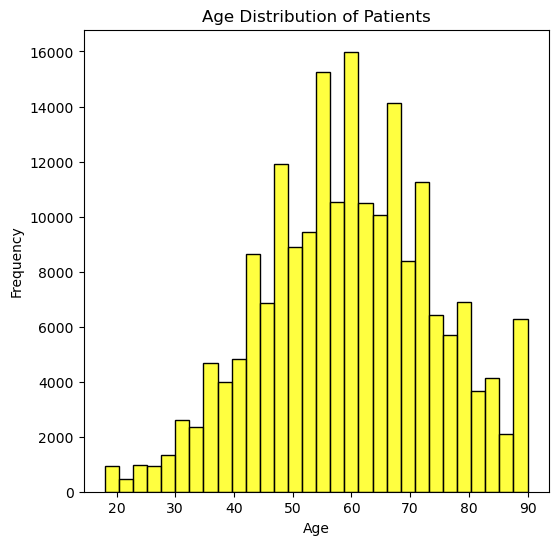

In [34]:
plt.figure(figsize=(6,6))
sns.histplot(data['Age'],bins=30,color="yellow")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

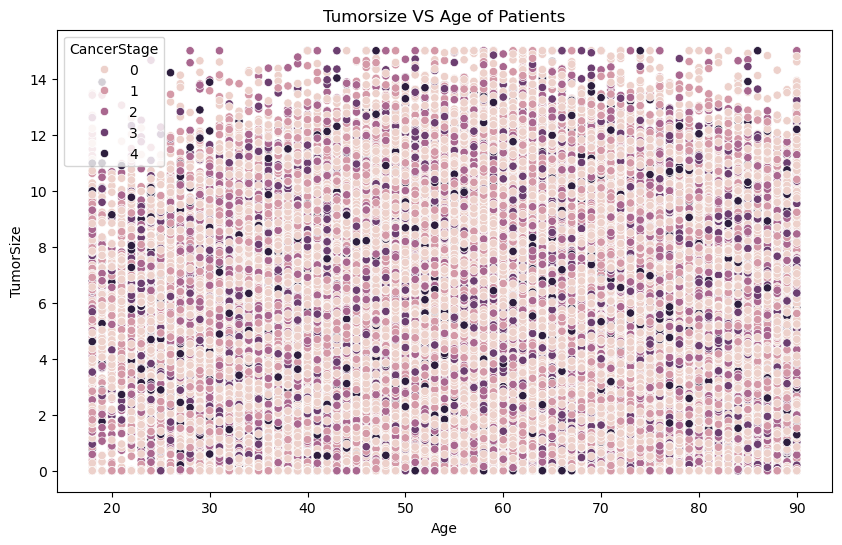

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='Age',y='TumorSize',hue='CancerStage')
plt.title("Tumorsize VS Age of Patients")
plt.xlabel("Age")
plt.ylabel("TumorSize")
plt.show()

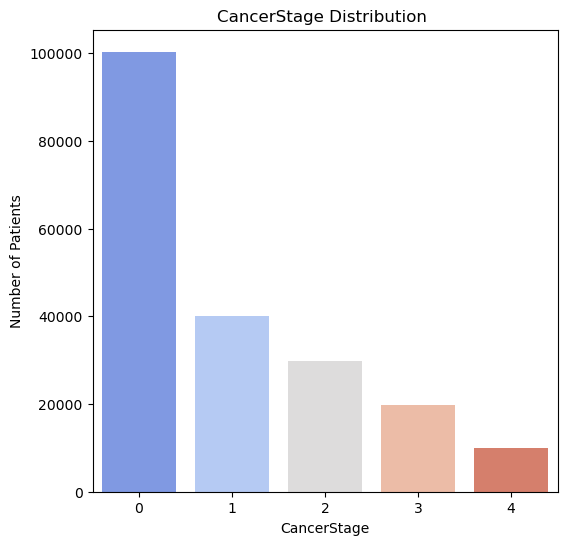

In [39]:
plt.figure(figsize=(6,6))
sns.countplot(data=data,x='CancerStage',palette='coolwarm')
plt.title("CancerStage Distribution ")
plt.xlabel("CancerStage")
plt.ylabel("Number of Patients")
plt.show()

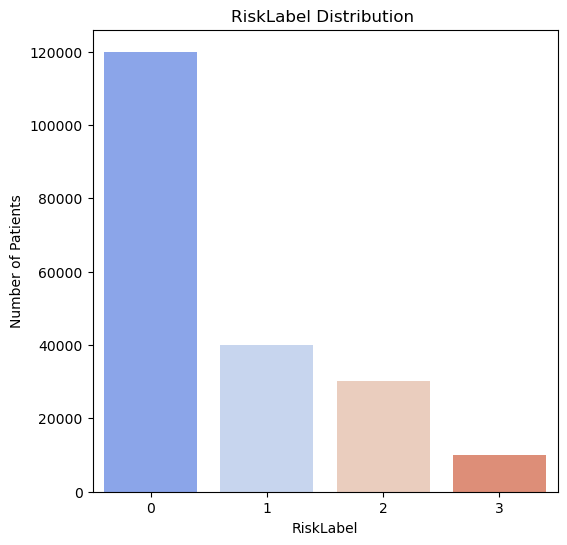

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(data=data,x='RiskLabel',palette='coolwarm')
plt.title("RiskLabel Distribution ")
plt.xlabel("RiskLabel")
plt.ylabel("Number of Patients")
plt.show()

In [42]:
numerical_columns=data.select_dtypes(include=["int64","float64"])

In [49]:
numerical_columns

,BMI,Comorbidity,Symptom,CA125,PreviousTreatment,Smoking,Alcohol,BRCA_Mutation,GeneExpression,SNP_Status,...,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability,Year,Month,Day
0,27.468755,0,0,66.738329,0,0,0,1,1.010648,0,...,0,0,0,12.077803,54.947593,2,0.176654,2019.0,1.0,1.0
1,27.736019,1,0,28.390526,0,0,0,0,0.826971,1,...,0,0,0,12.745908,46.864164,0,0.343371,2019.0,1.0,1.0
2,22.285561,0,0,118.120787,1,0,0,0,1.118767,0,...,0,0,0,12.495603,55.757130,0,0.036907,2019.0,1.0,1.0
3,31.315519,1,1,6.418598,1,0,0,0,1.128451,0,...,0,0,0,12.577276,50.462495,1,0.161943,2019.0,1.0,1.0
4,17.056296,1,0,65.912779,0,0,1,0,1.212960,0,...,2,0,0,14.698884,58.628299,0,0.554210,2019.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200095,37.250369,1,1,10.963560,0,0,0,0,0.854514,0,...,0,0,0,12.593397,53.628508,2,0.179641,2030.0,6.5,6.0
200096,16.790468,0,0,66.198115,0,0,0,0,1.249863,0,...,1,0,0,13.653758,52.514075,3,0.312034,2030.0,6.5,6.0
200097,21.333605,0,0,41.621119,0,0,0,0,0.836400,0,...,0,0,0,10.527138,60.000000,2,0.043449,2030.0,6.5,6.0
200098,31.607421,1,0,59.717572,0,0,0,0,1.198355,0,...,0,0,0,13.053107,51.423338,0,0.223509,2030.0,6.5,6.0


In [52]:
cor=numerical_columns.corr()
cor

,BMI,Comorbidity,Symptom,CA125,PreviousTreatment,Smoking,Alcohol,BRCA_Mutation,GeneExpression,SNP_Status,...,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability,Year,Month,Day
BMI,1.000000,0.001145,-0.002055,0.005936,0.002065,-0.000924,0.004004,0.001778,-0.001746,0.000184,...,0.001585,0.001953,-0.000508,0.003508,0.000974,0.001282,-0.000333,4.985260e-03,-1.980798e-04,2.435690e-03
Comorbidity,0.001145,1.000000,-0.001893,0.001196,0.000278,-0.002332,-0.000649,-0.001160,-0.002025,-0.000029,...,-0.000600,-0.004864,0.000542,-0.000449,0.002565,0.002627,-0.000148,1.786500e-04,-1.735549e-04,2.672742e-04
Symptom,-0.002055,-0.001893,1.000000,-0.001134,0.000342,0.003254,-0.002564,0.001382,0.003368,0.001967,...,-0.003600,0.000648,-0.001043,-0.000286,-0.001924,0.003917,-0.001422,6.439165e-04,1.527846e-03,-1.124845e-03
CA125,0.005936,0.001196,-0.001134,1.000000,0.002844,-0.003019,-0.001814,-0.001490,-0.001213,0.000259,...,-0.001635,-0.003792,-0.001978,-0.000373,-0.002600,0.001401,-0.003321,-1.247233e-03,-2.612140e-03,2.679787e-03
PreviousTreatment,0.002065,0.000278,0.000342,0.002844,1.000000,0.002057,-0.002643,-0.000417,0.000805,-0.001451,...,-0.000211,-0.001245,-0.000499,-0.000096,-0.002623,-0.002014,0.001360,-2.742742e-03,-1.946814e-03,-2.252552e-03
Smoking,-0.000924,-0.002332,0.003254,-0.003019,0.002057,1.000000,-0.003241,0.001759,0.000876,0.000887,...,0.001632,-0.002425,0.003546,-0.002810,-0.000517,0.000002,0.003055,-1.231765e-03,1.080964e-03,-3.672178e-03
Alcohol,0.004004,-0.000649,-0.002564,-0.001814,-0.002643,-0.003241,1.000000,0.000657,-0.002197,-0.000177,...,0.002760,0.002012,-0.003035,0.000205,0.002774,0.000260,-0.001956,5.463341e-03,-1.699043e-03,1.363515e-03
BRCA_Mutation,0.001778,-0.001160,0.001382,-0.001490,-0.000417,0.001759,0.000657,1.000000,0.002225,-0.003144,...,-0.001594,0.001148,0.000279,-0.003389,-0.003539,-0.001173,0.002145,1.354453e-03,2.023859e-03,1.113339e-03
GeneExpression,-0.001746,-0.002025,0.003368,-0.001213,0.000805,0.000876,-0.002197,0.002225,1.000000,0.004843,...,-0.003689,-0.001260,-0.003762,-0.003549,-0.000374,0.003028,-0.001779,-1.691607e-03,-3.861367e-03,2.312837e-03
SNP_Status,0.000184,-0.000029,0.001967,0.000259,-0.001451,0.000887,-0.000177,-0.003144,0.004843,1.000000,...,-0.002024,0.000833,-0.001100,-0.000176,0.000210,-0.002120,0.002355,-3.906679e-03,1.521633e-03,-1.687470e-03


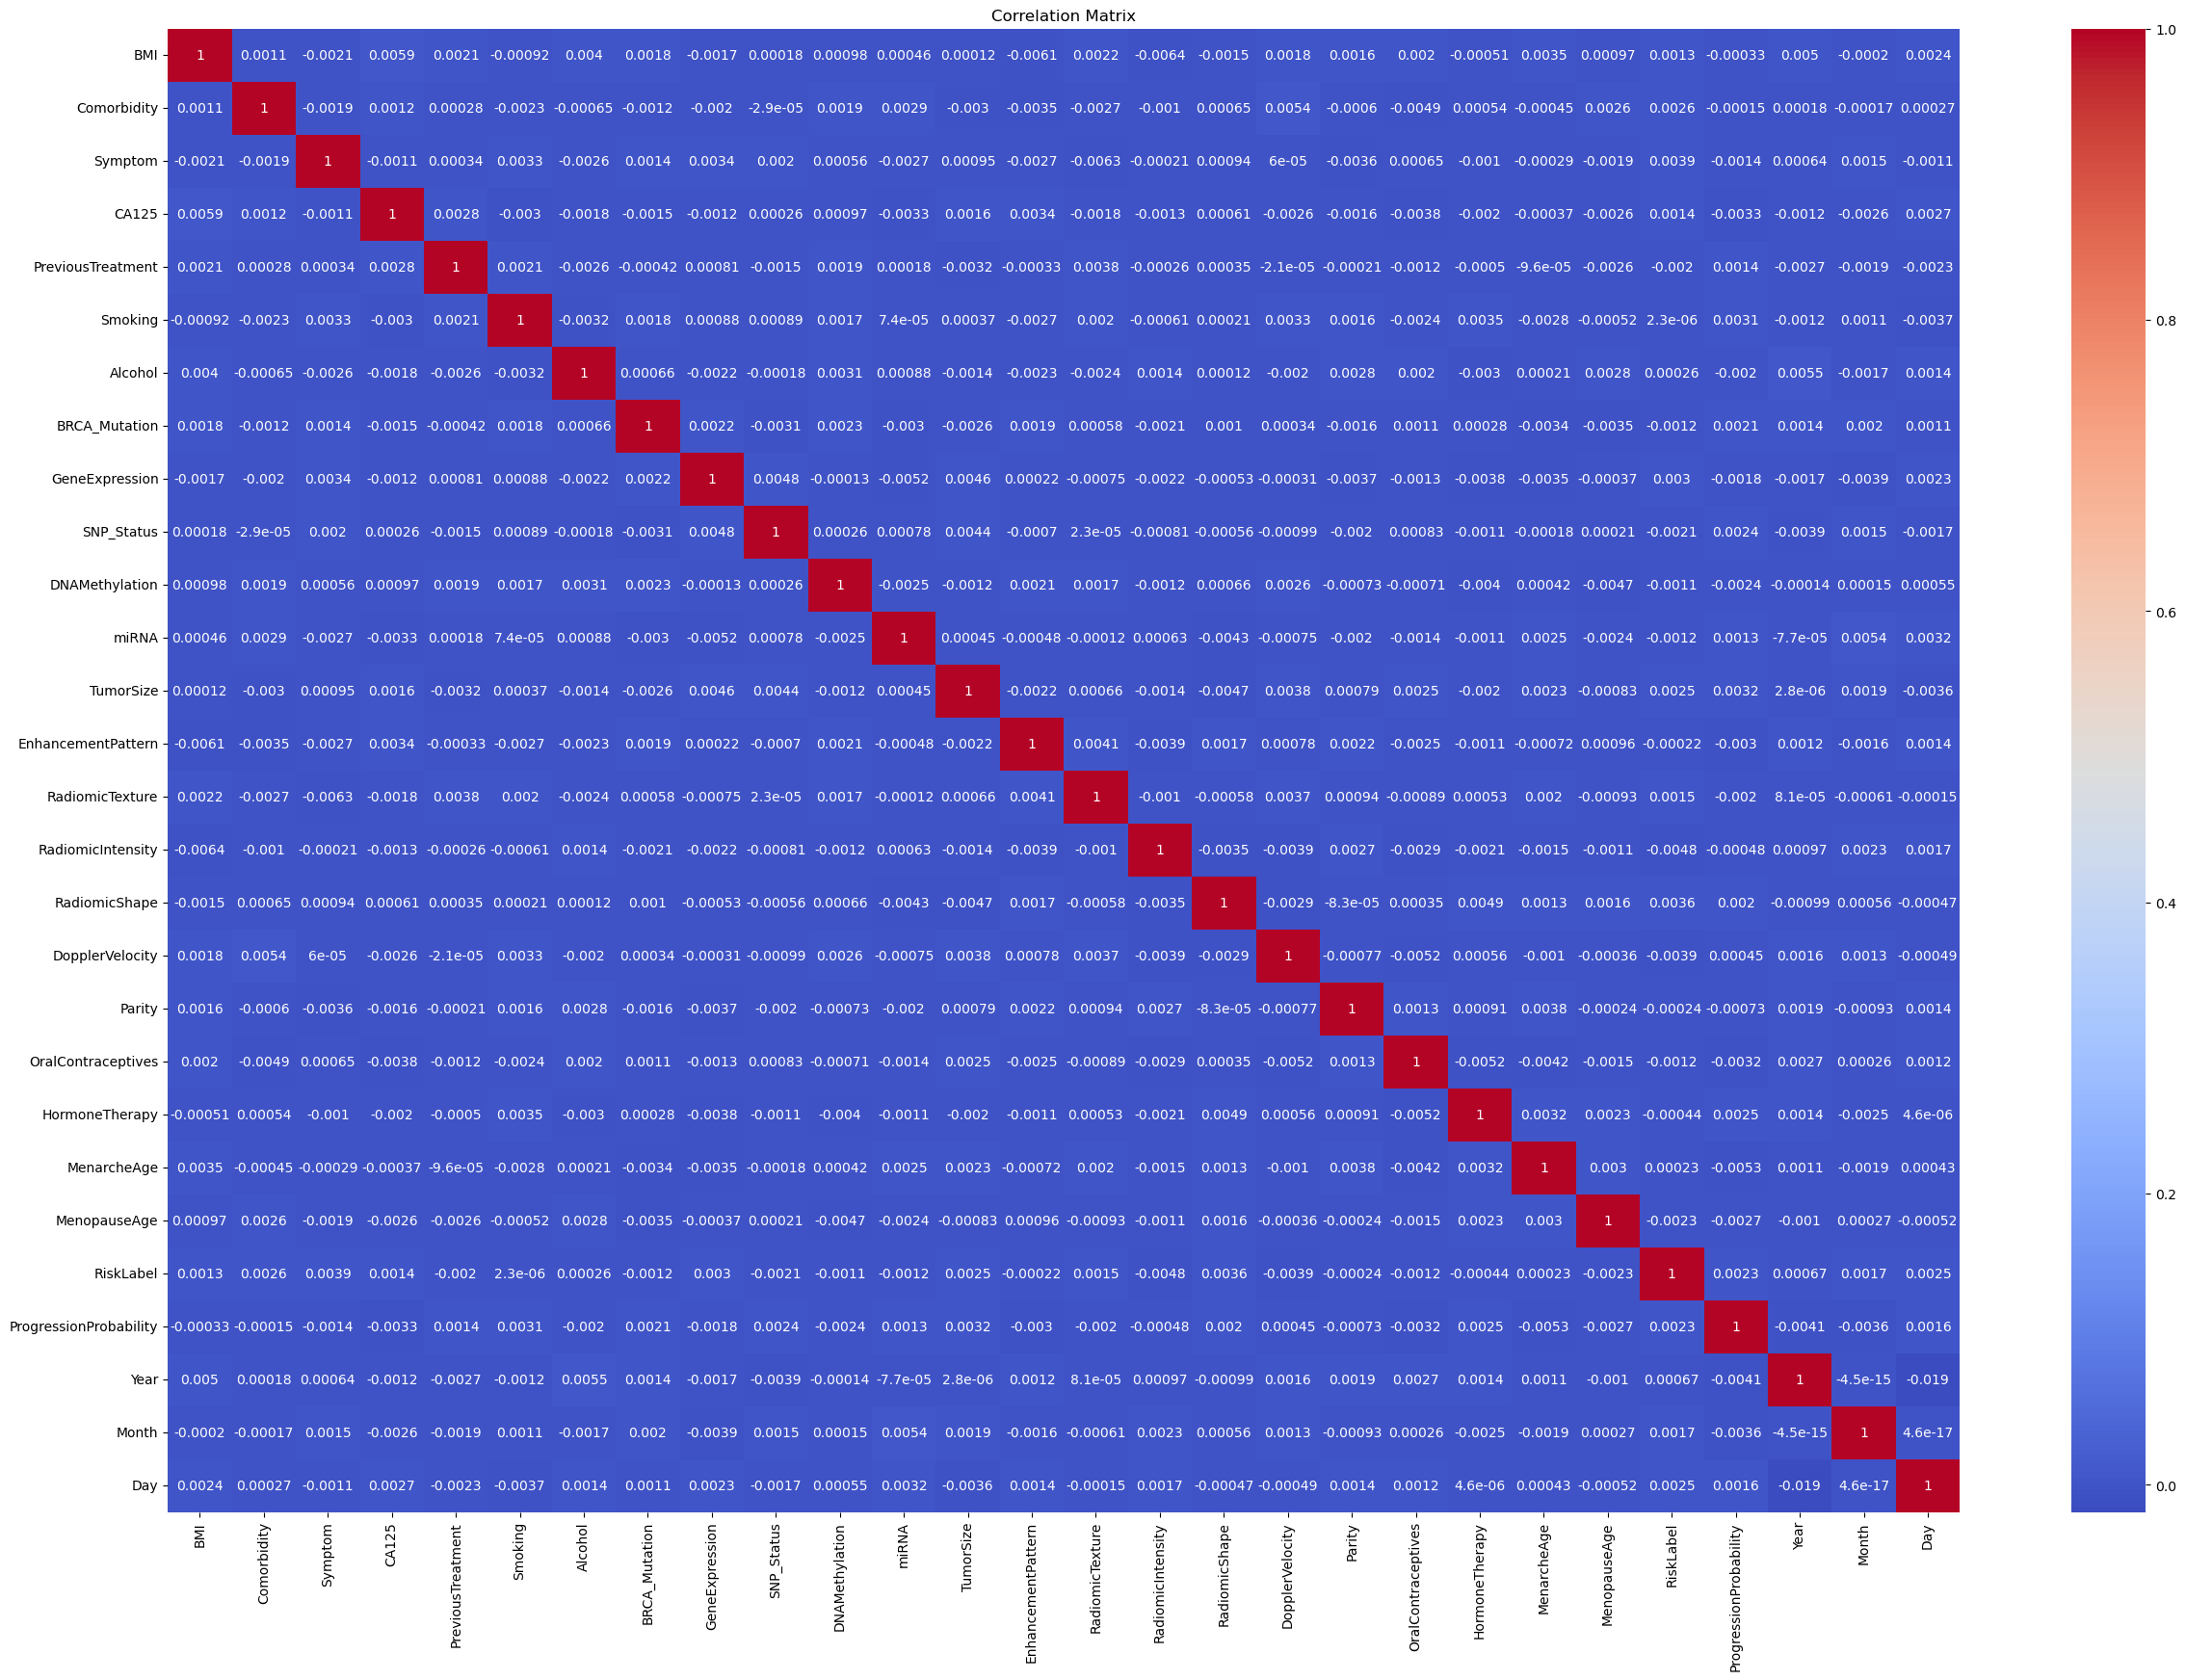

In [53]:
plt.figure(figsize=(30, 20))
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [54]:
numerical_columns=data.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['Age',
 'BMI',
 'Comorbidity',
 'Symptom',
 'CA125',
 'CancerStage',
 'Histopathology',
 'PreviousTreatment',
 'MenstrualHistory',
 'Ethnicity',
 'Smoking',
 'Alcohol',
 'Residence',
 'SocioeconomicStatus',
 'BRCA_Mutation',
 'GeneExpression',
 'SNP_Status',
 'DNAMethylation',
 'miRNA',
 'TumorSize',
 'TumorLocation',
 'EnhancementPattern',
 'RadiomicTexture',
 'RadiomicIntensity',
 'RadiomicShape',
 'DopplerVelocity',
 'Parity',
 'OralContraceptives',
 'HormoneTherapy',
 'MenarcheAge',
 'MenopauseAge',
 'RiskLabel',
 'ProgressionProbability',
 'Year',
 'Month',
 'Day']

**BOX PLOT FOR OUTLIER DETECTION**

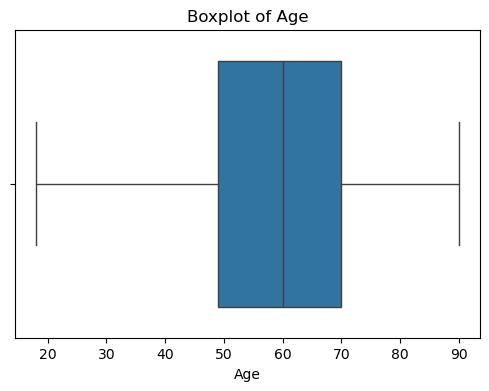

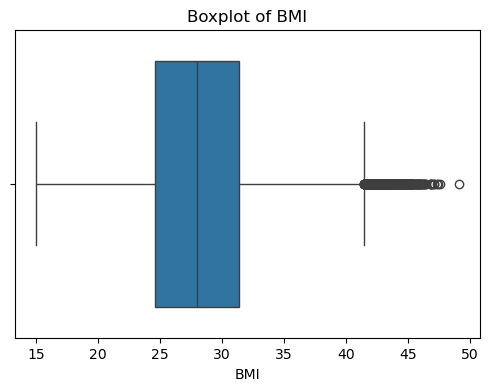

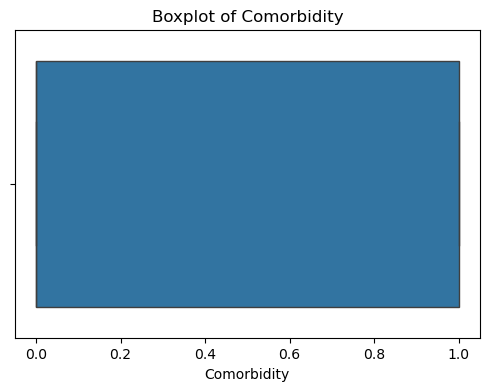

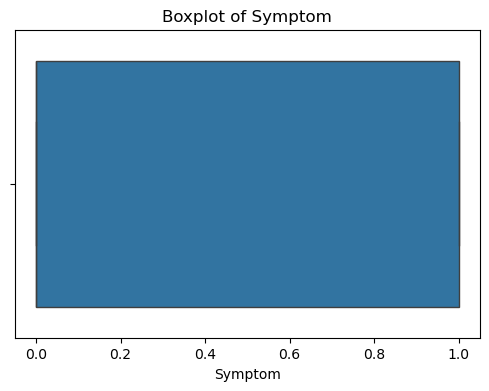

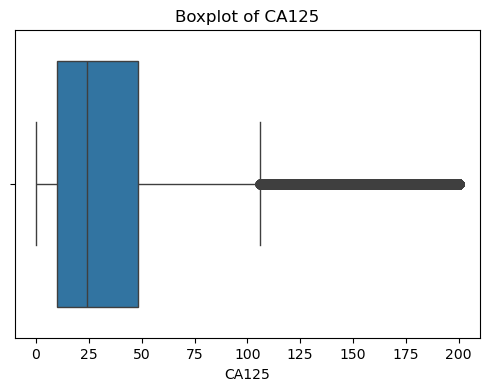

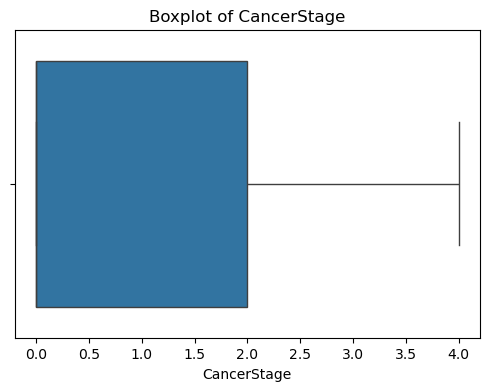

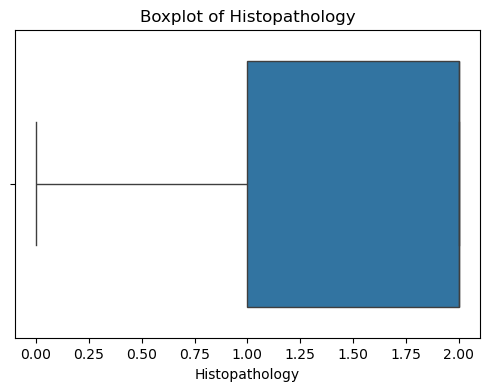

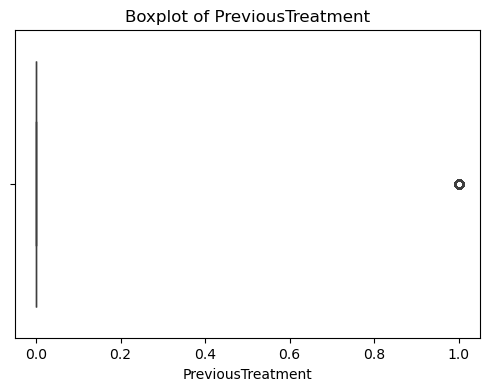

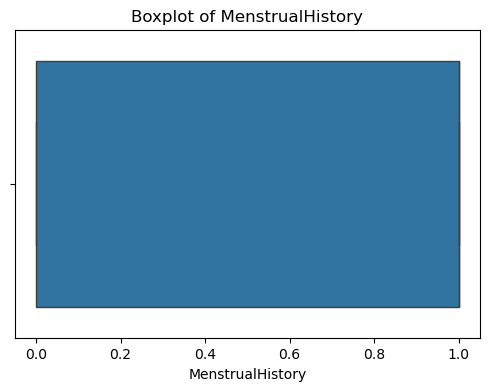

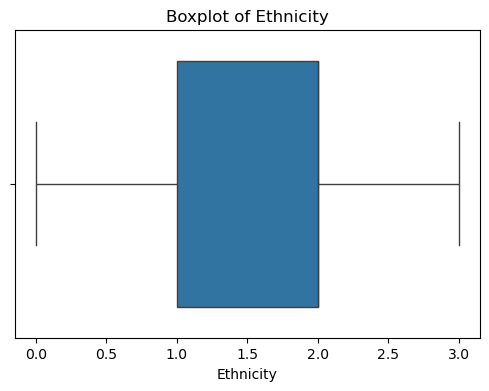

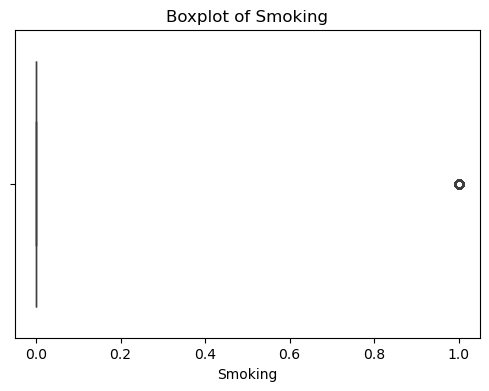

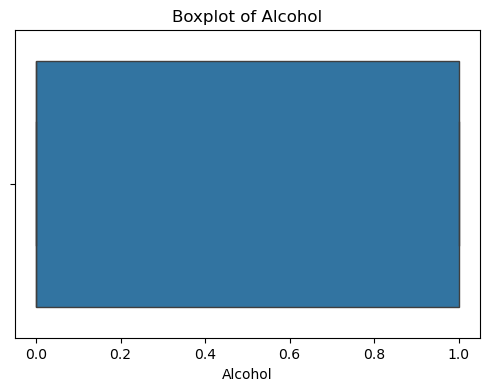

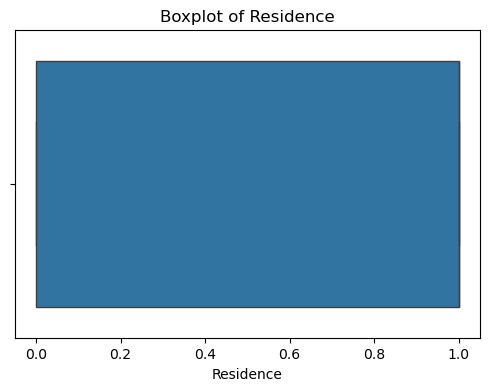

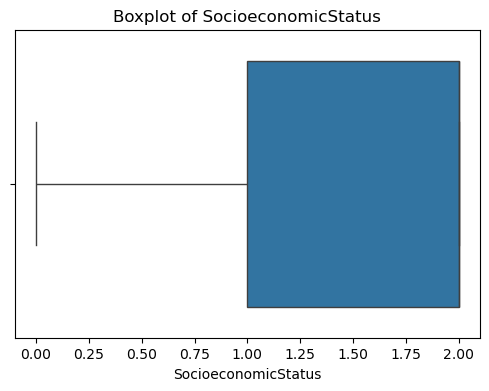

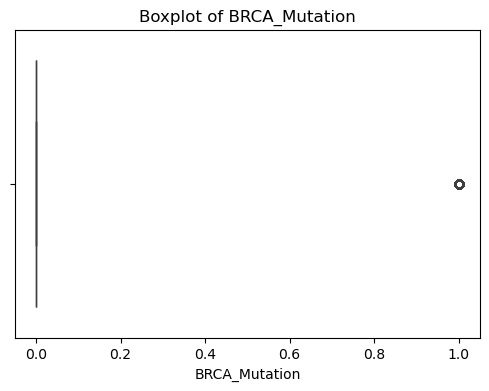

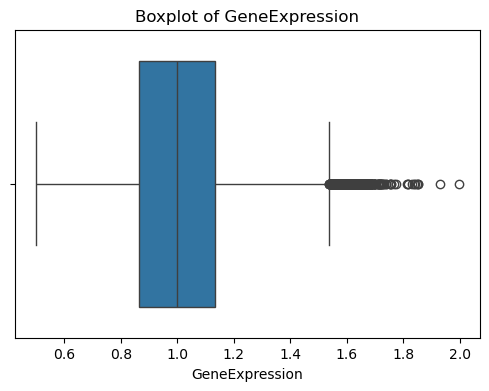

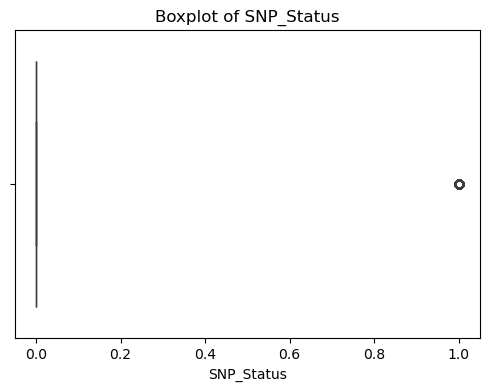

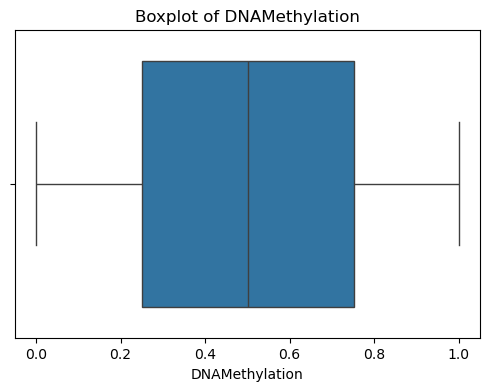

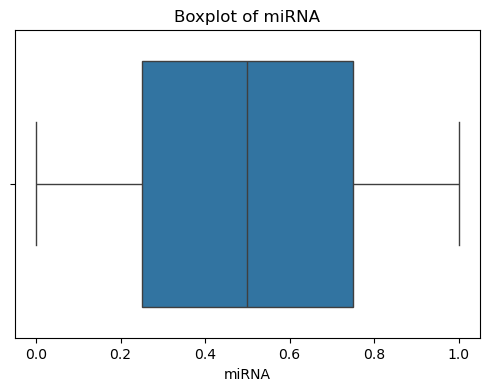

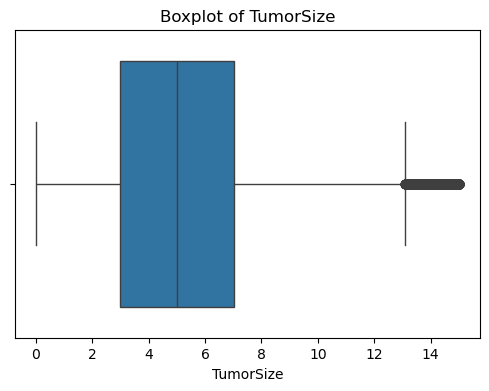

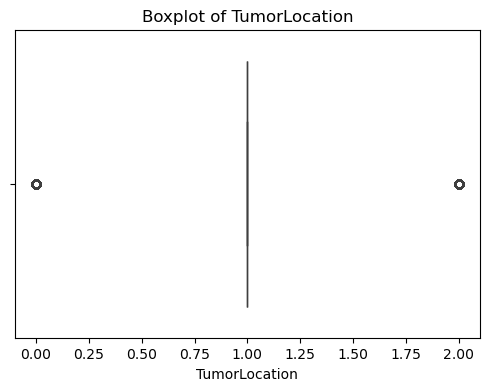

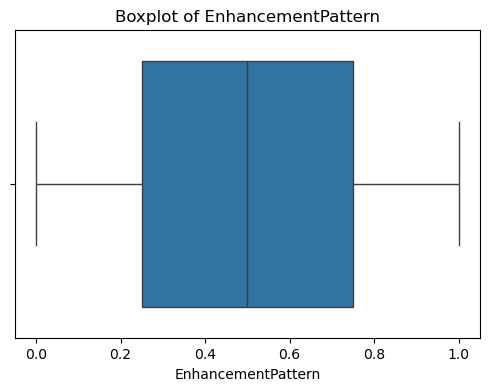

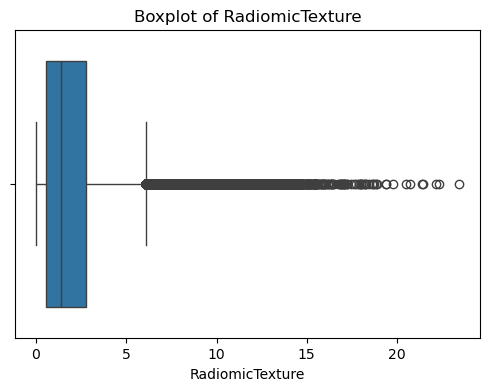

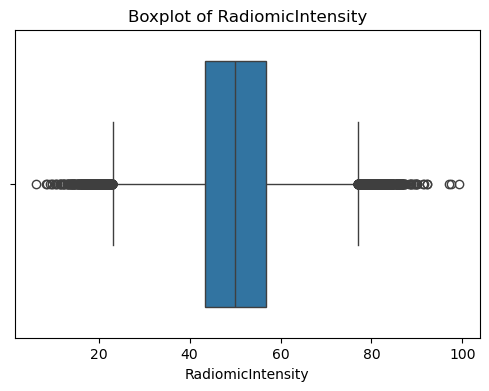

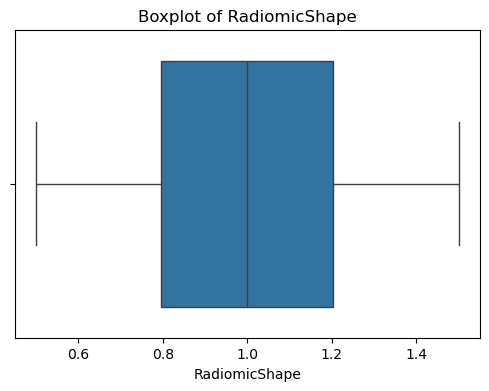

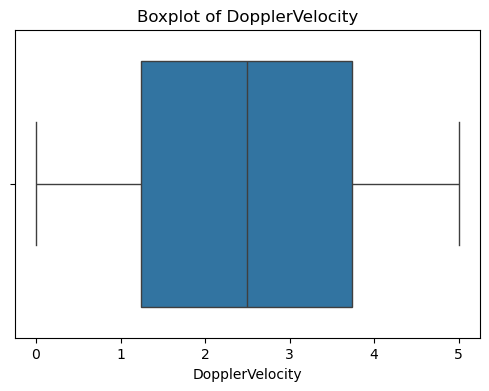

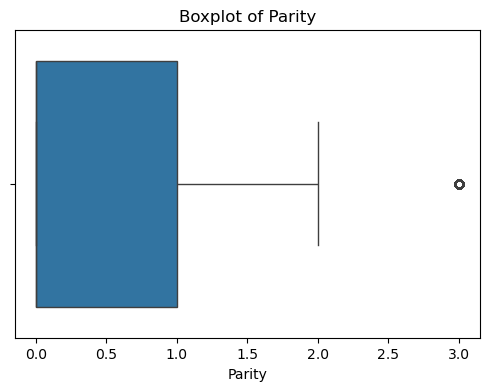

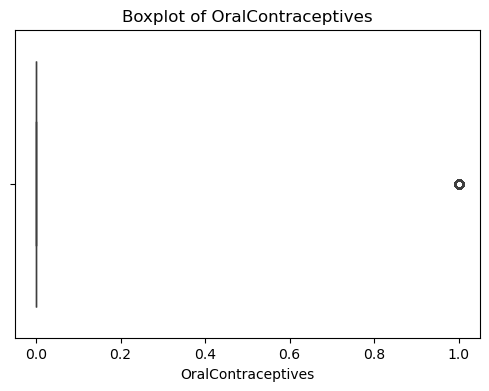

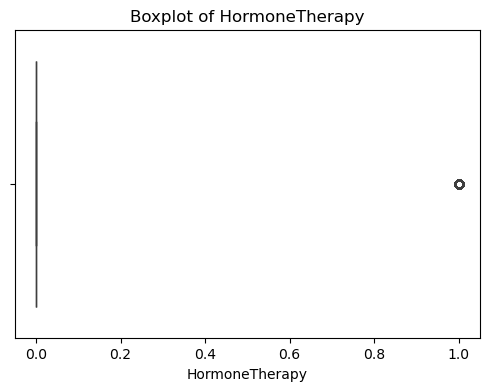

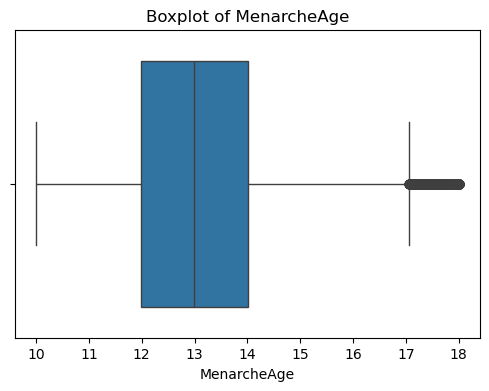

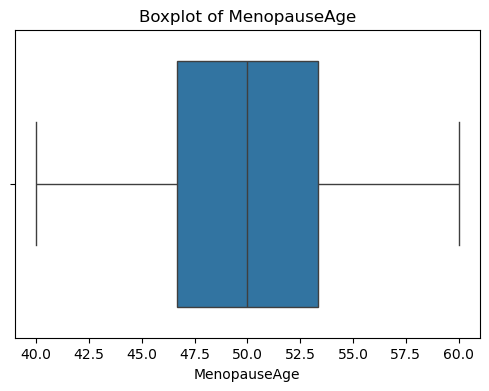

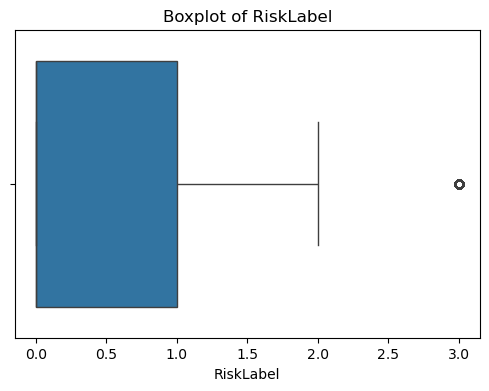

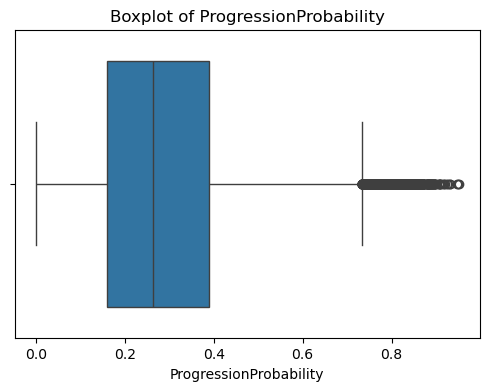

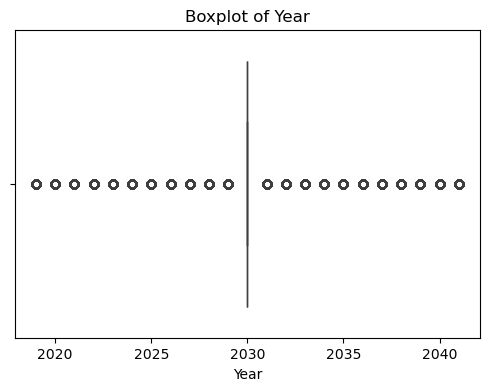

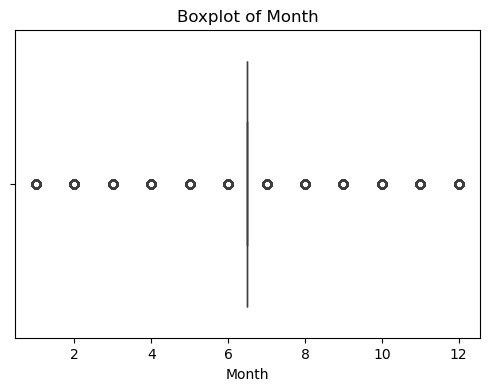

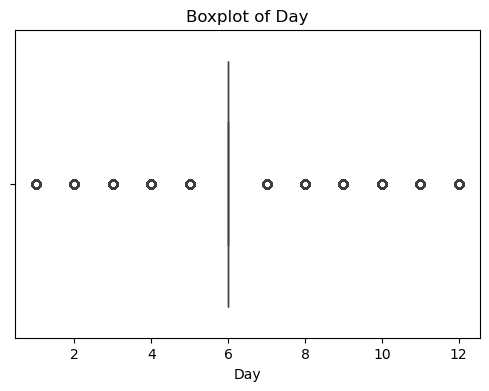

In [61]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**OUTLIER HANDLING**

In [64]:
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))

In [66]:
data_cleaned = data[~outlier_mask.any(axis=1)] 

In [67]:
data_cleaned

,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,Histopathology,PreviousTreatment,MenstrualHistory,Ethnicity,...,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability,Year,Month,Day
294,65,25.194876,0,0,44.763805,3,1,0,1,0,...,0,0,0,12.152635,54.094085,1,0.571996,2030.0,6.5,6.0
299,69,36.152199,0,1,42.506212,0,2,0,1,2,...,0,0,0,11.322423,52.583224,0,0.441851,2030.0,6.5,6.0
316,70,25.528416,1,0,11.065572,0,2,0,1,0,...,1,0,0,12.210501,48.811258,0,0.104832,2030.0,6.5,6.0
317,55,24.531685,0,0,28.541224,0,2,0,1,2,...,0,0,0,13.141309,53.680688,2,0.378163,2030.0,6.5,6.0
322,47,21.286571,0,0,14.002618,0,2,0,1,1,...,1,0,0,13.789935,40.000000,0,0.085306,2030.0,6.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200081,55,34.919767,1,0,12.960428,0,2,0,1,1,...,0,0,0,13.057596,45.673792,2,0.712366,2030.0,6.5,6.0
200082,47,34.731371,1,1,68.826449,3,0,0,1,2,...,0,0,0,13.716491,47.226583,1,0.466248,2030.0,6.5,6.0
200090,85,30.908187,0,1,38.469008,0,1,0,1,2,...,0,0,0,12.144083,50.896674,0,0.196505,2030.0,6.5,6.0
200095,56,37.250369,1,1,10.963560,3,2,0,1,2,...,0,0,0,12.593397,53.628508,2,0.179641,2030.0,6.5,6.0


**MODEL BUILDING AND TRAINING**

In [69]:
X = data_cleaned.drop(columns=["RiskLabel","ProgressionProbability"]) 
y = data_cleaned["RiskLabel"] 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**DECISION TREE CLASSIFIER**

In [73]:
dt = DecisionTreeClassifier(random_state=42)

In [74]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5,10,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [75]:
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [76]:
best_dt = grid_search.best_estimator_

In [77]:
y_pred = best_dt.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [79]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.6116
Confusion Matrix:
 [[3143    2    0]
 [1152    0    0]
 [ 841    1    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76      3145
           1       0.00      0.00      0.00      1152
           2       0.00      0.00      0.00       842

    accuracy                           0.61      5139
   macro avg       0.20      0.33      0.25      5139
weighted avg       0.37      0.61      0.46      5139



**RANDOM FOREST CLASSIFIER**

In [81]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)      
print("\nFeature Importance:\n", feature_importance_df)


cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"\nCross-Validation Accuracy: {np.mean(cv_scores):.4f}")

Accuracy: 0.6120
Confusion Matrix:
 [[3145    0    0]
 [1152    0    0]
 [ 842    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76      3145
           1       0.00      0.00      0.00      1152
           2       0.00      0.00      0.00       842

    accuracy                           0.61      5139
   macro avg       0.20      0.33      0.25      5139
weighted avg       0.37      0.61      0.46      5139


Feature Importance:
                 Feature  Importance
1                   BMI    0.070771
25      DopplerVelocity    0.068399
4                 CA125    0.067251
18                miRNA    0.066734
17       DNAMethylation    0.066486
23    RadiomicIntensity    0.066312
15       GeneExpression    0.065108
22      RadiomicTexture    0.064447
21   EnhancementPattern    0.064401
30         MenopauseAge    0.064362
19            TumorSize    0.061314
29          MenarcheAge    0.061310
24        Radi

**LOGISTIC REGRESSION**

In [82]:
log_reg = LogisticRegression(random_state=42, solver='liblinear')
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2']  
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_log_reg = grid_search.best_estimator_

best_log_reg.fit(X_train, y_train)
y_pred = best_log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Best Parameters: {'C': 0.01, 'penalty': 'l1'}
Accuracy: 0.6120
Confusion Matrix:
 [[3145    0    0]
 [1152    0    0]
 [ 842    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76      3145
           1       0.00      0.00      0.00      1152
           2       0.00      0.00      0.00       842

    accuracy                           0.61      5139
   macro avg       0.20      0.33      0.25      5139
weighted avg       0.37      0.61      0.46      5139



**KNeighborsClassifier**

In [84]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [85]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [86]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean']  
}

In [87]:
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [88]:
best_knn = grid_search.best_estimator_

In [89]:
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [90]:
y_pred = best_knn.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy: 0.5912
Confusion Matrix:
 [[2987  124   34]
 [1097   46    9]
 [ 805   32    5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.95      0.74      3145
           1       0.23      0.04      0.07      1152
           2       0.10      0.01      0.01       842

    accuracy                           0.59      5139
   macro avg       0.31      0.33      0.27      5139
weighted avg       0.44      0.59      0.47      5139



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


In [94]:
models = {
    
    "Decision Tree": DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),                                      
    "KNN": KNeighborsClassifier(n_neighbors=11, metric='euclidean', weights='uniform')
}

In [96]:
results = {}

In [97]:

for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    y_pred_proba = model.predict_proba(X_test)  
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    results[name] = {"Accuracy": accuracy}
    print(f"\n{name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC Score: {auc_roc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


**Comparison of Model Performance**

In [ ]:
results_data = pd.DataFrame(results).T
print("\nComparison of Model Performance:\n.", results_data)


**BEST MODEL**

In [ ]:
best_model = results_data.sort_values(by=['Accuracy',],ascending=False).index[0]
print(f"\n Best Model: {best_model}   ")

**CONCLUSION**

This project aimed to develop a predictive model for 'ovarian cancer risk and progression' using an integration of clinical and biological data. By integrating patient demographics, medical history, and laboratory results, we have developed a predictive that can assist in early diagnosis and personalized treatment planning. Through this project, we can conclude that the Logistic Regression model is the best model with the highest accuracy(0.500400).